In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
data = pd.read_csv("Coronavirus_cases_daily_update.csv")
#look for only Turkey's data
df = data.loc[data["location"] == "Turkey"]
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
391728,TUR,Asia,Turkey,2024-07-31,17004718.0,0.0,0.0,101419.0,0.0,0.0,...,41.1,NaN,2.81,77.69,0.82,85341248,NaN,NaN,NaN,NaN
391729,TUR,Asia,Turkey,2024-08-01,17004718.0,0.0,0.0,101419.0,0.0,0.0,...,41.1,NaN,2.81,77.69,0.82,85341248,NaN,NaN,NaN,NaN
391730,TUR,Asia,Turkey,2024-08-02,17004718.0,0.0,0.0,101419.0,0.0,0.0,...,41.1,NaN,2.81,77.69,0.82,85341248,NaN,NaN,NaN,NaN
391731,TUR,Asia,Turkey,2024-08-03,17004718.0,0.0,0.0,101419.0,0.0,0.0,...,41.1,NaN,2.81,77.69,0.82,85341248,NaN,NaN,NaN,NaN
391732,TUR,Asia,Turkey,2024-08-04,17004718.0,0.0,0.0,101419.0,0.0,0.0,...,41.1,NaN,2.81,77.69,0.82,85341248,NaN,NaN,NaN,NaN


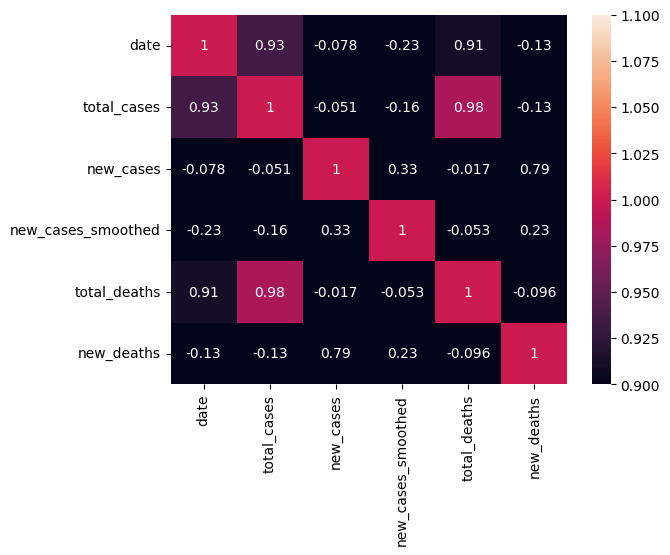

In [ ]:
import seaborn as sns
df["date"] = pd.to_datetime(df["date"])

# spliting df to select most corralated columns
start = df.columns.get_loc("date")
end = df.columns.get_loc("new_deaths")

filtered_df = df.iloc[:, start:end+1]

#Pearsonn corralation of each selected column(group)
heatmap = sns.heatmap(filtered_df.corr(method="pearson"), vmin=1, vmax=1, annot=True )

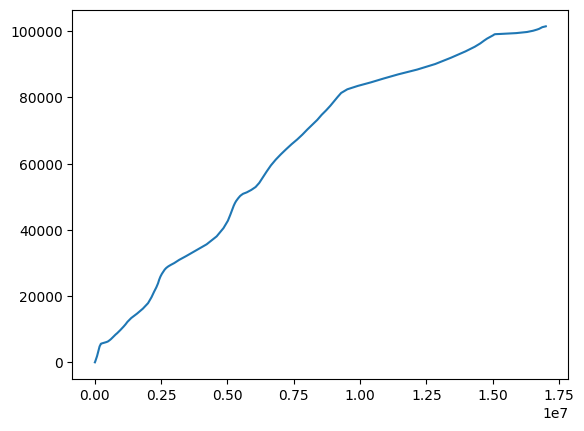

In [79]:

total_cases = df["total_cases"]
total_deaths = df["total_deaths"]


plt.plot(total_cases,total_deaths)
plt.show()

In [ ]:
# dropping NaN and select just 2 columns
data = df[["total_cases", "total_deaths"]].dropna()

X = data["total_cases"].values.reshape(-1, 1)  # independent var
y = data["total_deaths"].values               # dependent var

# Splitting to train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:

y_pred = model.predict(X_test)

# Model Performance
mse = mean_squared_error(y_test, y_pred)
r_square = model.score(X_test, y_test)

print("Mean Squared Error" , mse)
print("R^2 : ", r_square)


Mean Squared Error 47123321.42651389
R^2 :  0.9704828906979153


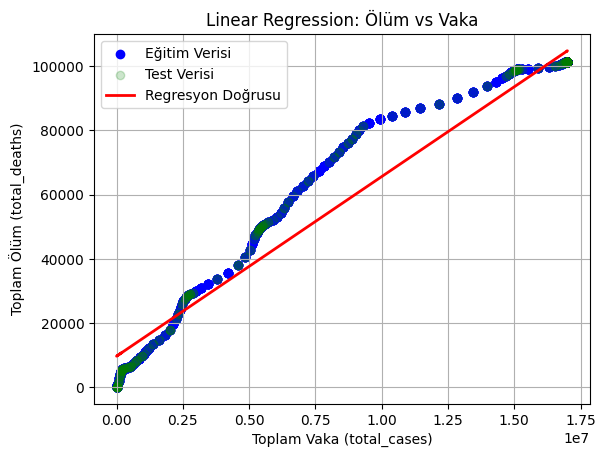

In [112]:
plt.scatter(X_train, y_train, color="blue", label="Eğitim Verisi")
plt.scatter(X_test, y_test, color="green", alpha= 0.2,  label="Test Verisi")


plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regresyon Doğrusu")

plt.xlabel("Toplam Vaka (total_cases)")
plt.ylabel("Toplam Ölüm (total_deaths)")
plt.title("Linear Regression: Ölüm vs Vaka")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

next_total_cases = 1e7   # example new case


new_data = np.array([[next_total_cases]])

# new predict
predicted_deaths = model.predict(new_data)

print(f"Toplam vaka {next_total_cases} iken tahmini toplam ölüm: {predicted_deaths}")


Toplam vaka 10000000.0 iken tahmini toplam ölüm: [65592.63826691]
